In [1]:
import tensorflow as tf
import shap
from model.convolutional import reshape_input
from data.load import load_train_data, load_test_data
from data.file import model_convolutional
from keras.models import load_model
from numpy.random import choice

## required for shap
tf.compat.v1.disable_eager_execution()

In [2]:
print("SHAP version is      :", shap.__version__)
print("Tensorflow version is:", tf.__version__)
print("")

x_train, y_train = load_train_data()
x_test, y_test = load_test_data()

x_train_reshaped, y_train_reshaped = reshape_input(x_train, y_train)
x_test_reshaped, y_test_reshaped = reshape_input(x_test, y_test)

SHAP version is      : 0.40.0
Tensorflow version is: 2.6.2



In [3]:
model = load_model(model_convolutional)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [4]:
elements = 5
background = x_test_reshaped[choice(x_test_reshaped.shape[0], 100, replace=False)]
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(x_test_reshaped[1:elements])

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


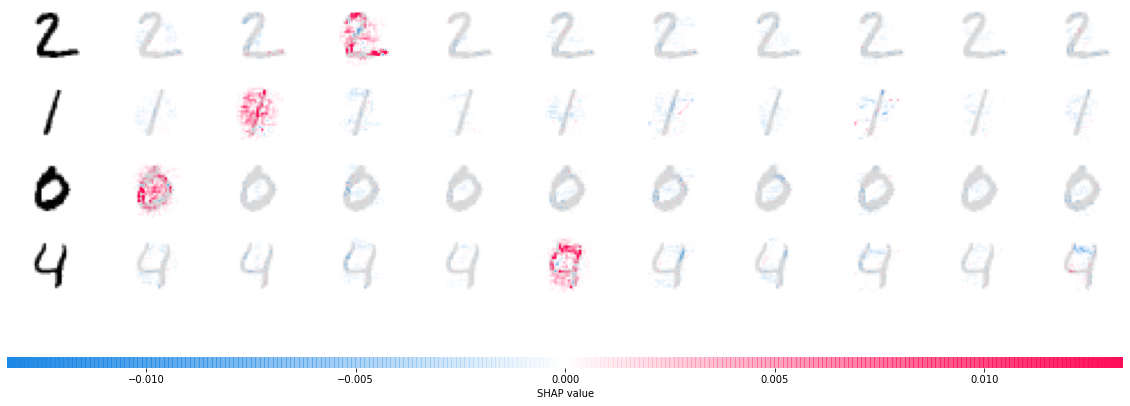

In [5]:
shap.image_plot(shap_values, -x_test_reshaped[1:elements])

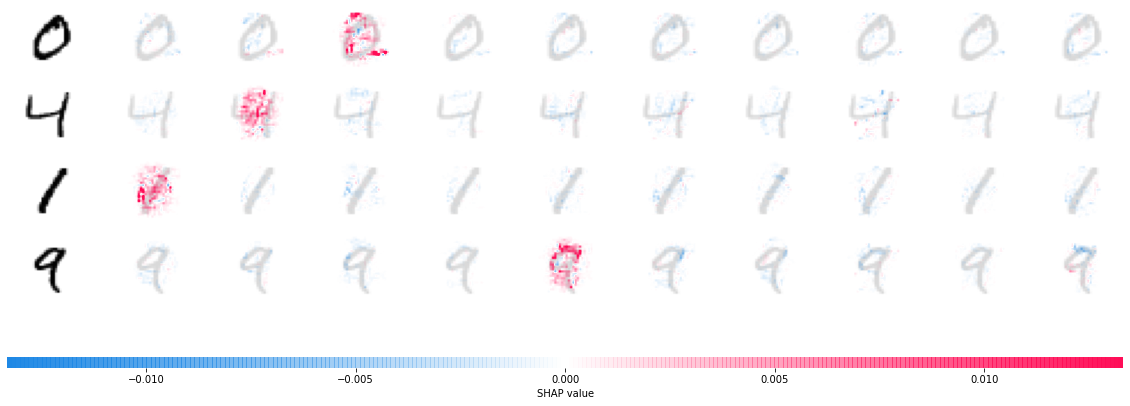

In [6]:
shap.image_plot(shap_values, -x_train_reshaped[1:elements])